In [ ]:
# Original Title: AI Used to Improve Patient Care and Treatment
# New Title: fMRI Analysis Using Nilearn 

# Name: Caedyn Lipovsky
# Year: Sophomore 

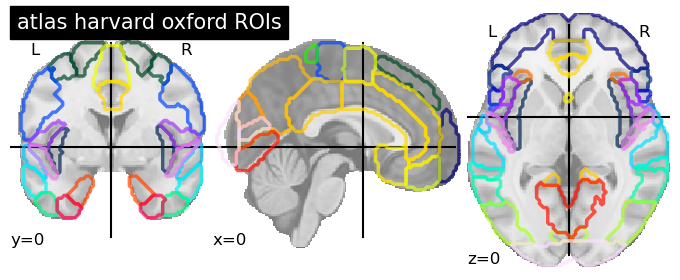

In [138]:
from nilearn import plotting 
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets

# this part of the code is extracted from the medium article linked in sources

harvard_dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
harvard_maps = harvard_dataset.maps
harvard_labels = harvard_dataset.labels
plotting.plot_roi(harvard_maps, view_type='contours',title='atlas harvard oxford ROIs')

# based on report generated previously, there are 48 non-overlapping regions in the atlas

In [182]:
import os
import pandas as pd

# TEST SCORES

cognitive = pd.read_csv('cisdata/cognitive_tests.tsv.txt','\t')
print(cognitive)

   participant_id  moca_total  drs   tmt_a   tmt_b  bta  sdmt_oral  bnt  \
0        sub-0202          23  133   27.82  159.49   19         38   59   
1        sub-0203          25  136   59.25  301.23   16         25   52   
2        sub-0204          26  137   51.38  161.55   14         44   56   
3        sub-0205          25  137   34.50  144.40   14         37   57   
4        sub-0206          22  135   39.30  169.34   14         36   49   
5        sub-0207          30  140   26.92   58.23   17         63   56   
6        sub-0209          26  135   43.09   99.50   17         43   57   
7        sub-0210          26  142   21.98   56.19   16         61   56   
8        sub-0212          22  136   70.66  175.60    7         26   60   
9        sub-0213          27  142   39.28   85.79   15         42   57   
10       sub-0214          24  140   66.36  116.44   12         44   59   
11       sub-0222          30  140   28.54   74.63   16         55   59   
12       sub-0224        

In [140]:
import nibabel 
import nibabel as nib
from nibabel.testing import data_path 
import nilearn as nil
from nilearn import image
from nilearn.image import smooth_img 
import os 
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi

import warnings
warnings.filterwarnings("ignore")

# 64,64,34,300 coordinates x,y,z,time
# all functional mri images - only brain no skull 
# subjects are 55-89 years old 

# I imported 10 subjects chosen at random based on MOCA score
# I selected normal and impaired participants 
# MOCA tests are used to test cognitive function
# 26 score or above is considered normal
# See above data file for MOCA scores of all participants 

sub1 = nib.load('cisdata/sub1.nii')  #sub-0202
sub2 = nib.load('cisdata/sub2.nii')  #sub-0207   # highest MOCA score 
sub3 = nib.load('cisdata/sub3.nii')  #sub-0212
sub4 = nib.load('cisdata/sub4.nii')  #sub-0227
sub5 = nib.load('cisdata/sub5.nii')  #sub-0233
sub6 = nib.load('cisdata/sub6.nii')  #sub-247
sub7 = nib.load('cisdata/sub7.nii')  #sub-0256
sub8 = nib.load('cisdata/sub8.nii')  #sub-0264
sub9 = nib.load('cisdata/sub9.nii')  #sub-2131
sub10 = nib.load('cisdata/sub10.nii')#sub-2141    # lowest MOCA score 

# GOAL: COMPARE HEALTHY TO DISEASED BRAIN 
# BEST OUTCOME: MAKE MODEL THAT PREDICTS 

In [154]:
# PARTICIPANT BACKGROUND DATA
import os
import pandas as pd

# AGE in years
# SEX: 0, male; 1, female 
# HANDEDNESS: 1, ambidextrous; 2, left; 3, right
# EDUCATION in years
 

background = pd.read_csv('cisdata/participants.tsv.txt','\t')
print(background)


   participant_id                 age  sex      handedness  years_of_education
0        sub-0202    76.9260273972603    1         3 Right                  16
1        sub-0203    73.3257654016019    1          2 Left                  12
2        sub-0204    55.0602739726027    1         3 Right                  14
3        sub-0205   77.43231529306091    1         3 Right                  16
4        sub-0206    72.0191780821918    1         3 Right                  12
5        sub-0207    67.2931506849315    1         3 Right                  19
6        sub-0209    73.8943334081892    0         3 Right                  16
7        sub-0210  55.208219178082196    0          2 Left                  16
8        sub-0212   80.36986301369859    1         3 Right                  16
9        sub-0213   72.09589041095892    1         3 Right                  18
10       sub-0214    68.0575342465753    1          2 Left                  16
11       sub-0222    59.0109589041096    1         3

In [156]:
# LOAD BEHAVIORAL DATA 
import os
import pandas as pd

# COGNITIVE TEST
# first score- attention
# second score- executive 
# third score - global 
# fourth score - language memory 
# fifth score - visuospatial 

behavioral = pd.read_csv('cisdata/cognitive_domains.tsv.txt', '\t')
print(behavioral)

   participant_id  attention  executive   global  language   memory  \
0        sub-0202    0.74333    0.08219 -0.12135   0.58319 -1.26360   
1        sub-0203    0.22898   -0.72817  0.25027  -0.24200 -0.66063   
2        sub-0204    0.18272    0.18931  0.41475  -0.36043  0.95818   
3        sub-0205    0.35645    0.12266  0.29293  -0.25917  0.61895   
4        sub-0206    0.30705    0.00481 -0.15784  -1.18563  0.46936   
5        sub-0207    0.62534    0.96298  1.02999   0.33756  0.43116   
6        sub-0209    0.45892    0.41552  0.32941   0.61332  0.58259   
7        sub-0210    0.61256    0.93263  0.62807   0.30847  0.61987   
8        sub-0212   -0.46109   -0.21207 -0.11517   0.91712 -0.36007   
9        sub-0213    0.37088    0.45054  0.74989  -0.37550 -0.02038   
10       sub-0214   -0.09870    0.36773  0.29912   1.07760  0.16787   
11       sub-0222    0.54504    0.74443  1.02999   0.67044  1.18418   
12       sub-0224    0.09792   -0.54298 -0.95612  -1.04126 -0.51012   
13    


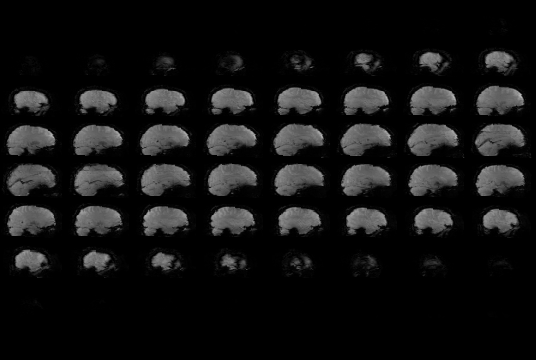
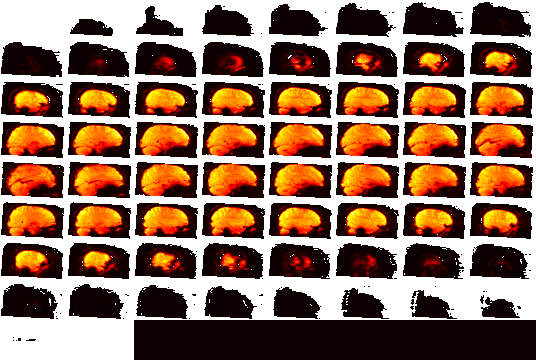

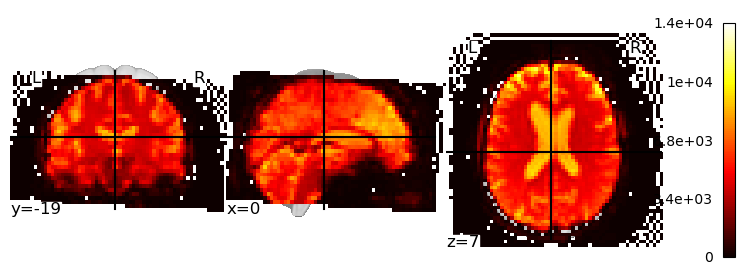

In [159]:
# MAKE 4D IMAGES INTO 3D IMAGES AND PREPROCESS
# STEP 1- Find mean image of all 4d images
# STEP 2- Smooth images
# STEP 3- Add a mask to all images 

### 3D SUB1 ###
from nilearn import image as nli
from nilearn import image
from nilearn.image import smooth_img 

first_sub1 = image.index_img(sub1,0)    # 3D IMAGE 
plotting.plot_stat_map(first_sub1)

img = nli.mean_img(sub1)
plotting.view_img(img, bg_img=img)      # MEAN OF ALL 4D IMAGES 


Parameter,Value
detrend,False
dtype,None
high_pass,None
high_variance_confounds,False
low_pass,None
mask_args,None
mask_img,None
mask_strategy,background
memory,Memory(location=None)
memory_level,1


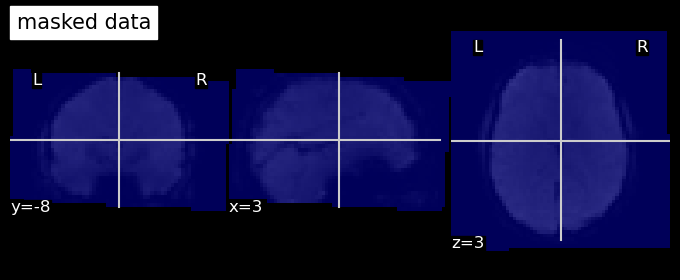

In [163]:
from nilearn import plotting 
from nilearn.input_data import NiftiMasker

masker = NiftiMasker()
masker.fit(smoothed_img1)

plotting.plot_roi(masker.mask_img_, img, title="masked data")      # cannot use smoothed img to mask 
report = masker.generate_report()
report

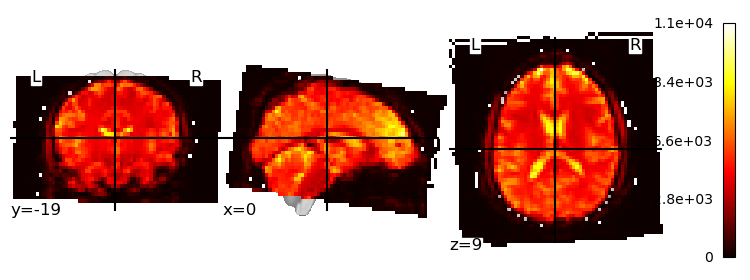

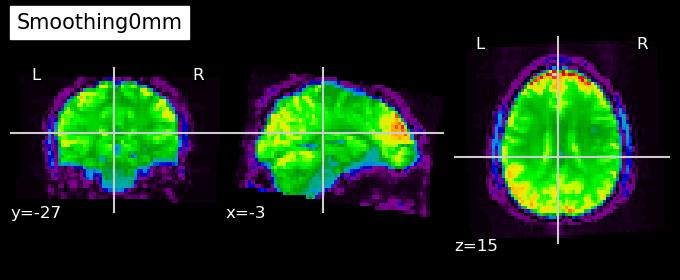

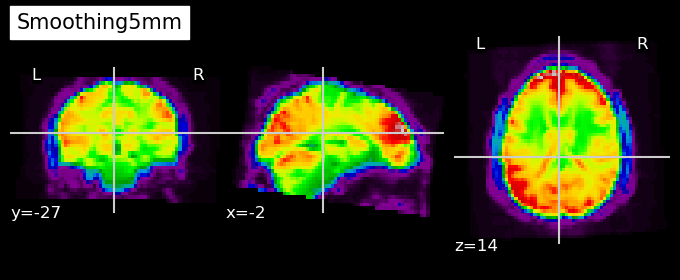

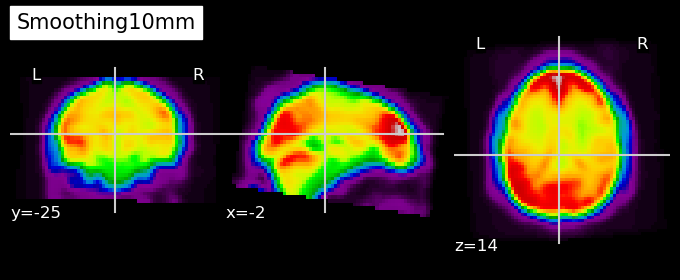

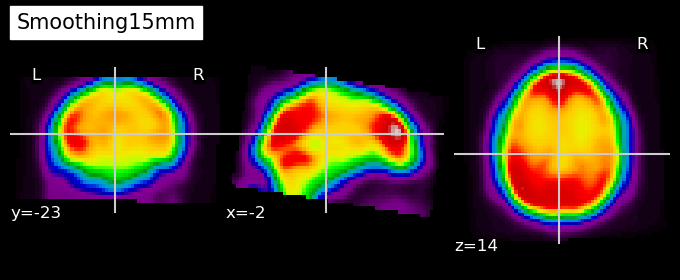

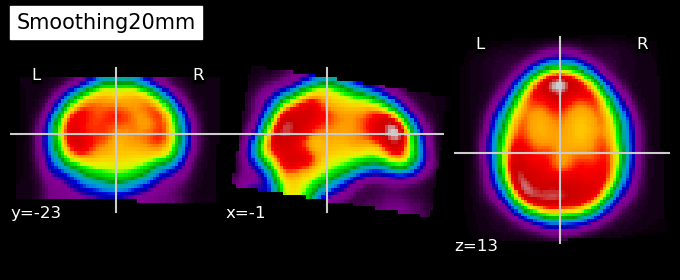

In [158]:
### 3D SUB2 ###
from nilearn import image as nli
from nilearn import image
from nilearn.image import smooth_img 

img2 = nli.mean_img(sub2)
plotting.view_img(img2, bg_img=img2)

first_sub2 = image.index_img(sub2,0)    # 3D IMAGE 
plotting.plot_stat_map(first_sub2)

# Compare Mean image of 4D images to 3D images of one time slot 

for smoothing in range(0,25,5): 
    smoothed_img2 = image.smooth_img(img2, smoothing)
    plotting.plot_epi(smoothed_img2, title=f"Smoothing{int(smoothing)}mm")



In [175]:
from nilearn import plotting 
from nilearn.input_data import NiftiMasker

from nilearn import plotting 
from nilearn.input_data import NiftiMasker

# MASKING IS USED TO OUTLINE AREAS OF INTEREST # 

masker = NiftiMasker(mask_strategy="epi", mask_args =dict(opening=10))
masker.fit(img2)
report = masker.generate_report()
report 
# the location used 

Parameter,Value
detrend,False
dtype,None
high_pass,None
high_variance_confounds,False
low_pass,None
mask_args,{'opening': 10}
mask_img,None
mask_strategy,epi
memory,Memory(location=None)
memory_level,1


In [213]:
# 64,64,34,300
import os
import matplotlib.pyplot as plt #to enable plotting within notebook
from nilearn import image as nimg
from nilearn import plotting as nplot
import numpy as np
import matplotlib.pyplot as plt 

sliced = sub2.slicer[:,:,:,10]
nplot.view_img(sliced)

vox = sub2.slicer[63:64, 63:64, 33:34,:].get_fdata()
vox.shape

# result shows us that there is a single voxel with 300 timepoints 
# squish down to 1 dimensional array with 300 time-points

vox = vox.flatten()
vox.shape

(300,)


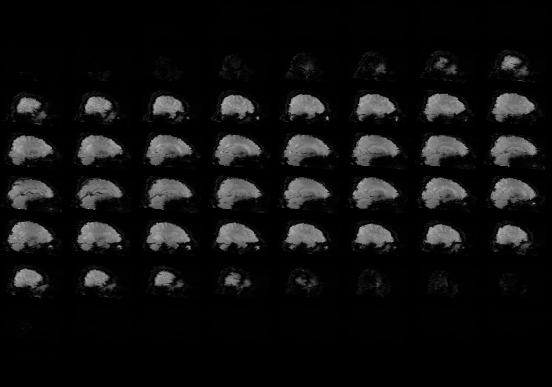
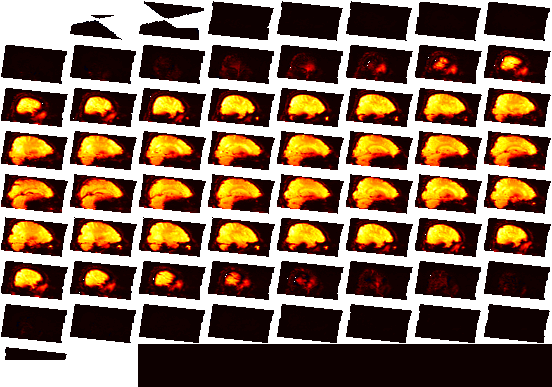

In [164]:
### 3D SUB3 ###

#first_sub3 = image.index_img(sub3,0)
#plotting.plot_stat_map(first_sub3)

img3 = nli.mean_img(sub3)
plotting.view_img(img3, bg_img=img3)


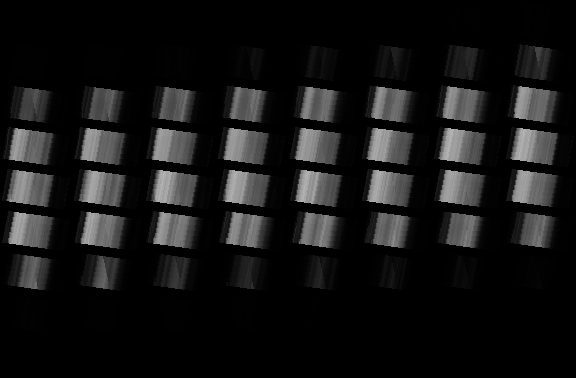
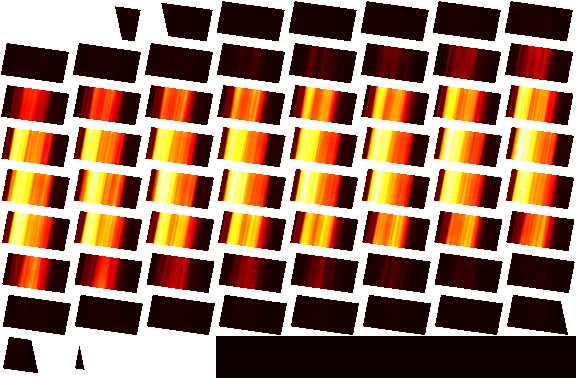

In [165]:
### 3D SUB4 ###

#first_sub4 = image.index_img(sub4,0)
#plotting.plot_stat_map(first_sub4)

img4 = nli.mean_img(sub4)
plotting.view_img(img4, bg_img=img4)


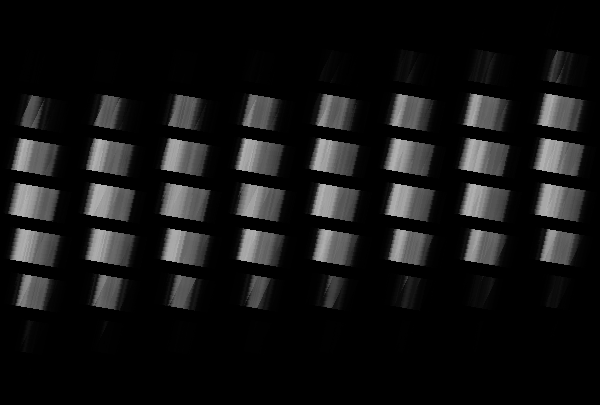
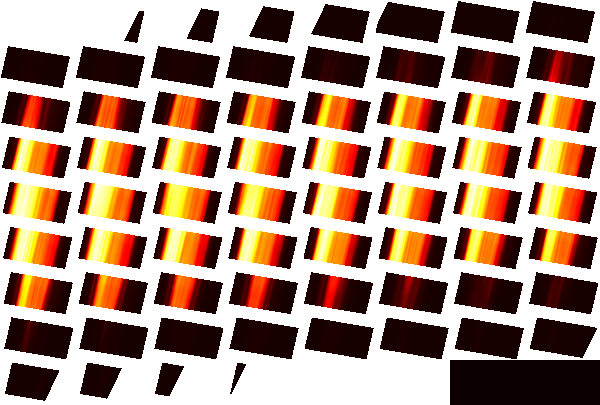

In [166]:
### 3D SUB5 ###

#first_sub5 = image.index_img(sub5,0)
#plotting.plot_stat_map(first_sub5)

img5 = nli.mean_img(sub5)
plotting.view_img(img5, bg_img=img5)


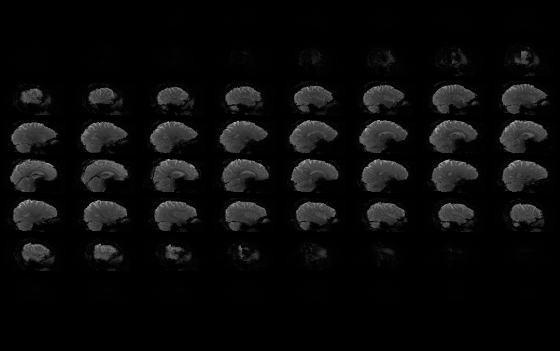
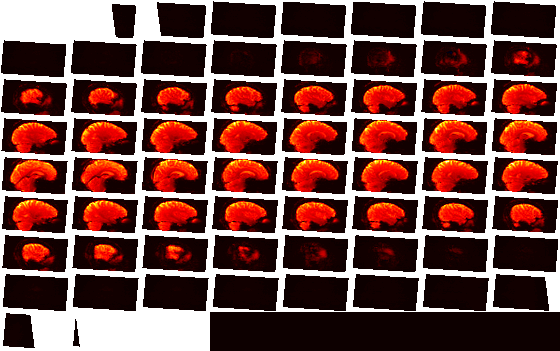

In [167]:
### 3D SUB6 ###

#first_sub6 = image.index_img(sub6,0)
#plotting.plot_stat_map(first_sub6)

img6 = nli.mean_img(sub6)
plotting.view_img(img6, bg_img=img6)


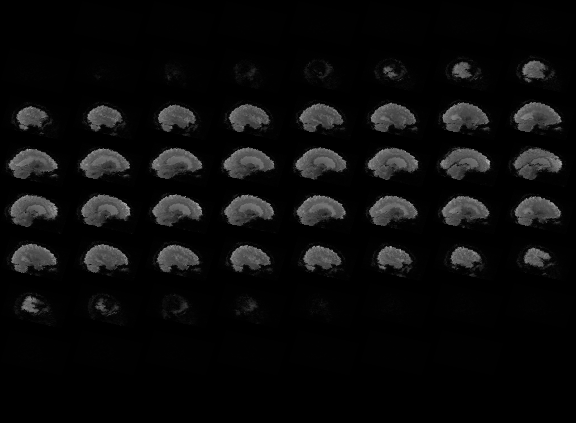
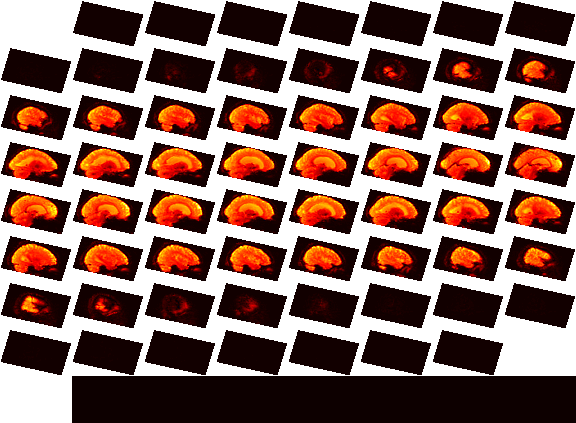

In [168]:
### 3D SUB7 ###

#first_sub7 = image.index_img(sub7,0)
#plotting.plot_stat_map(first_sub7)

img7 = nli.mean_img(sub7)
plotting.view_img(img7, bg_img=img7)


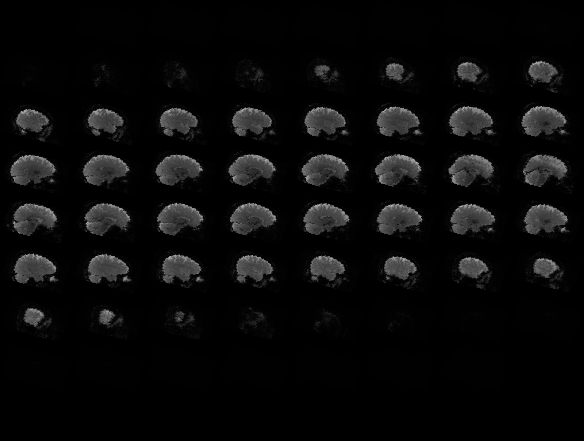
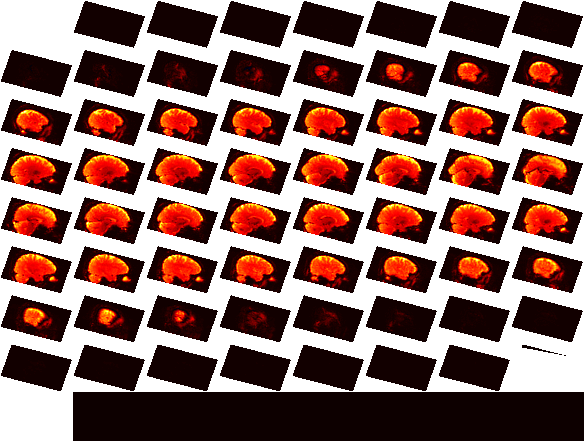

In [169]:
### 3D SUB8 ###

#first_sub8 = image.index_img(sub8,0)
#plotting.plot_stat_map(first_sub8)

img8 = nli.mean_img(sub8)
plotting.view_img(img8, bg_img=img8)


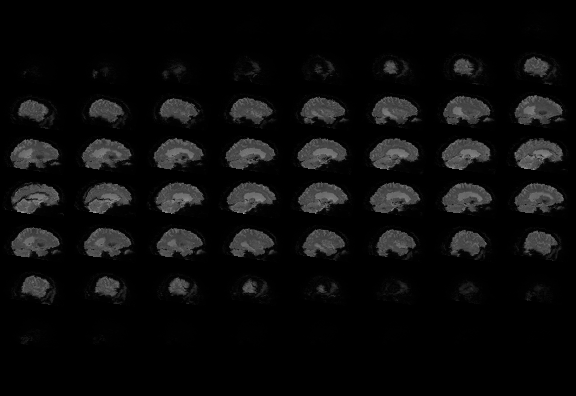
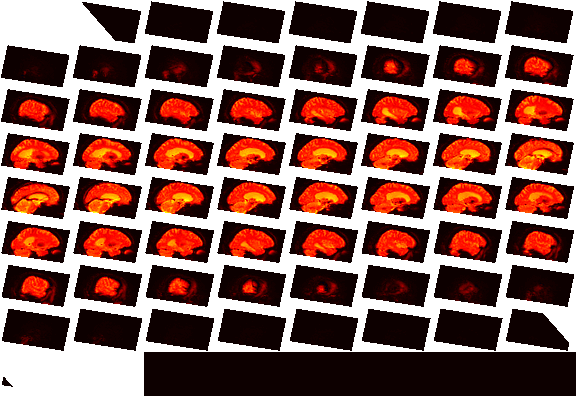

In [170]:
### 3D SUB9 ###

#first_sub9 = image.index_img(sub9,0)
#plotting.plot_stat_map(first_sub9)

img9 = nli.mean_img(sub9)
plotting.view_img(img9, bg_img=img9)

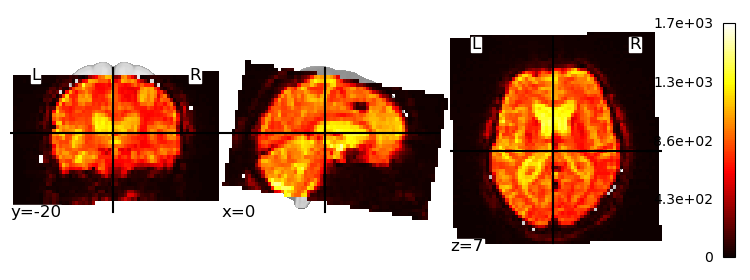

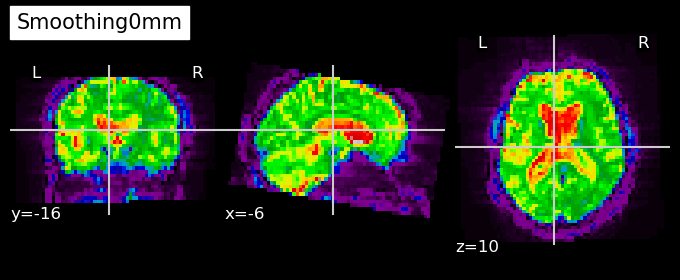

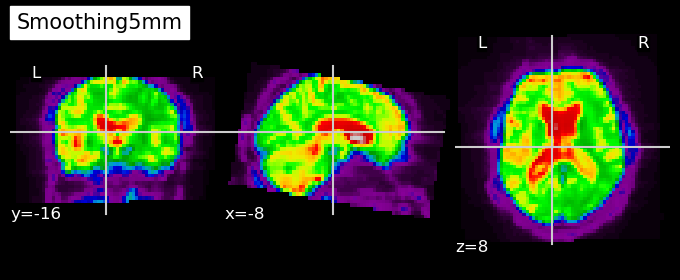

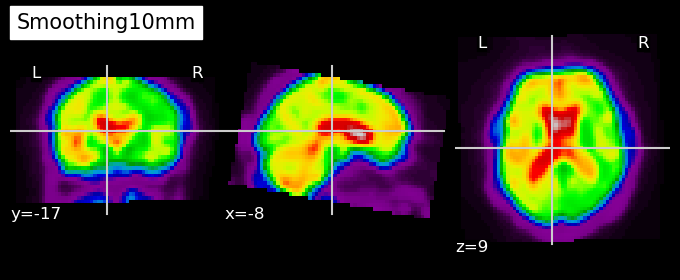

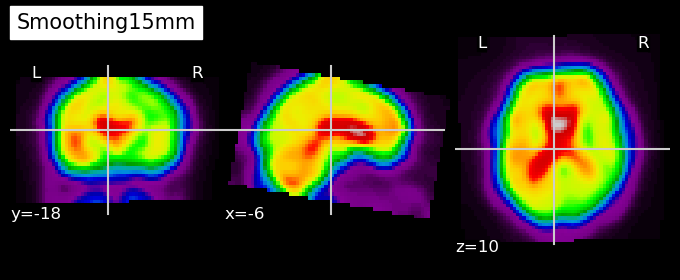

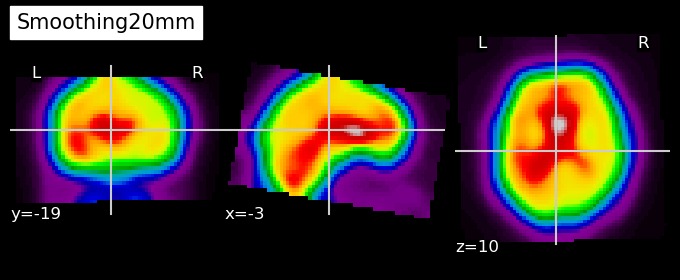

In [161]:
### 3D SUB10 ###
from nilearn import image as nli
from nilearn import image
from nilearn.image import smooth_img 

img10 = nli.mean_img(sub10)
plotting.view_img(img10, bg_img=img10)

first_sub10 = image.index_img(sub10,0)    # 3D IMAGE 
plotting.plot_stat_map(first_sub10)

# Compare Mean image of 4D images to 3D images of one time slot 

for smoothing in range(0,25,5): 
    smoothed_img10 = image.smooth_img(img10, smoothing)
    plotting.plot_epi(smoothed_img10, title=f"Smoothing{int(smoothing)}mm")

In [162]:
from nilearn import plotting 
from nilearn.input_data import NiftiMasker

from nilearn import plotting 
from nilearn.input_data import NiftiMasker

# MASKING IS USED TO OUTLINE AREAS OF INTEREST # 

masker = NiftiMasker(mask_strategy="epi", mask_args =dict(opening=10))
masker.fit(img10)
report = masker.generate_report()
report 

Parameter,Value
detrend,False
dtype,None
high_pass,None
high_variance_confounds,False
low_pass,None
mask_args,{'opening': 10}
mask_img,None
mask_strategy,epi
memory,Memory(location=None)
memory_level,1
